# HHA 550 Diabetes Prediction Dataset

# Import Packages

In [1]:
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm
# !pip install ipykernel
# !pip install --upgrade nbformat



In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import csv 
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno
import re 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

### Start with Loading the CSV Data

In [4]:
diabetes = pd.read_csv('data/new_diabetic_data_cleaned.csv')

In [5]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
0,88792836,100654011,0,0,7,1,3,3,1,4,5,0,0,0,2,1,1,2
1,88986678,58682736,0,1,8,2,1,11,5,4,3,0,0,0,2,0,1,0
2,89032962,69250302,0,1,6,4,1,1,7,7,4,0,0,0,0,0,1,1
3,89191392,62022042,0,1,4,1,1,3,7,9,11,0,0,0,0,0,1,1
4,89277516,30950811,0,1,5,4,3,1,1,5,5,0,0,0,0,0,1,1


### Insights into our target variable

In [6]:
y = diabetes['readmitted']
print(f'Percentage of patient had a readmission: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a readmission: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a readmission: % 45.83 --> (478 patient)
Percentage of patient did not have a readmission: % 44.58 --> (465 patient)


### Visualize readmittance

In [7]:
fig = px.histogram(diabetes, x="readmitted", title='Readmitted within 30 days', width=400, height=400)
fig.show()

### Check for Missing Data / Missing Values

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              1043 non-null   int64
 1   patient_nbr               1043 non-null   int64
 2   race                      1043 non-null   int64
 3   gender                    1043 non-null   int64
 4   age                       1043 non-null   int64
 5   weight                    1043 non-null   int64
 6   admission_type_id         1043 non-null   int64
 7   discharge_disposition_id  1043 non-null   int64
 8   admission_source_id       1043 non-null   int64
 9   payer_code                1043 non-null   int64
 10  medical_specialty         1043 non-null   int64
 11  max_glu_serum             1043 non-null   int64
 12  A1Cresult                 1043 non-null   int64
 13  metformin                 1043 non-null   int64
 14  insulin                   1043 non-null 

In [9]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
encounter_id,0,0.0
patient_nbr,0,0.0
diabetesMed,0,0.0
change,0,0.0
insulin,0,0.0
metformin,0,0.0
A1Cresult,0,0.0
max_glu_serum,0,0.0
medical_specialty,0,0.0
payer_code,0,0.0


<AxesSubplot: >

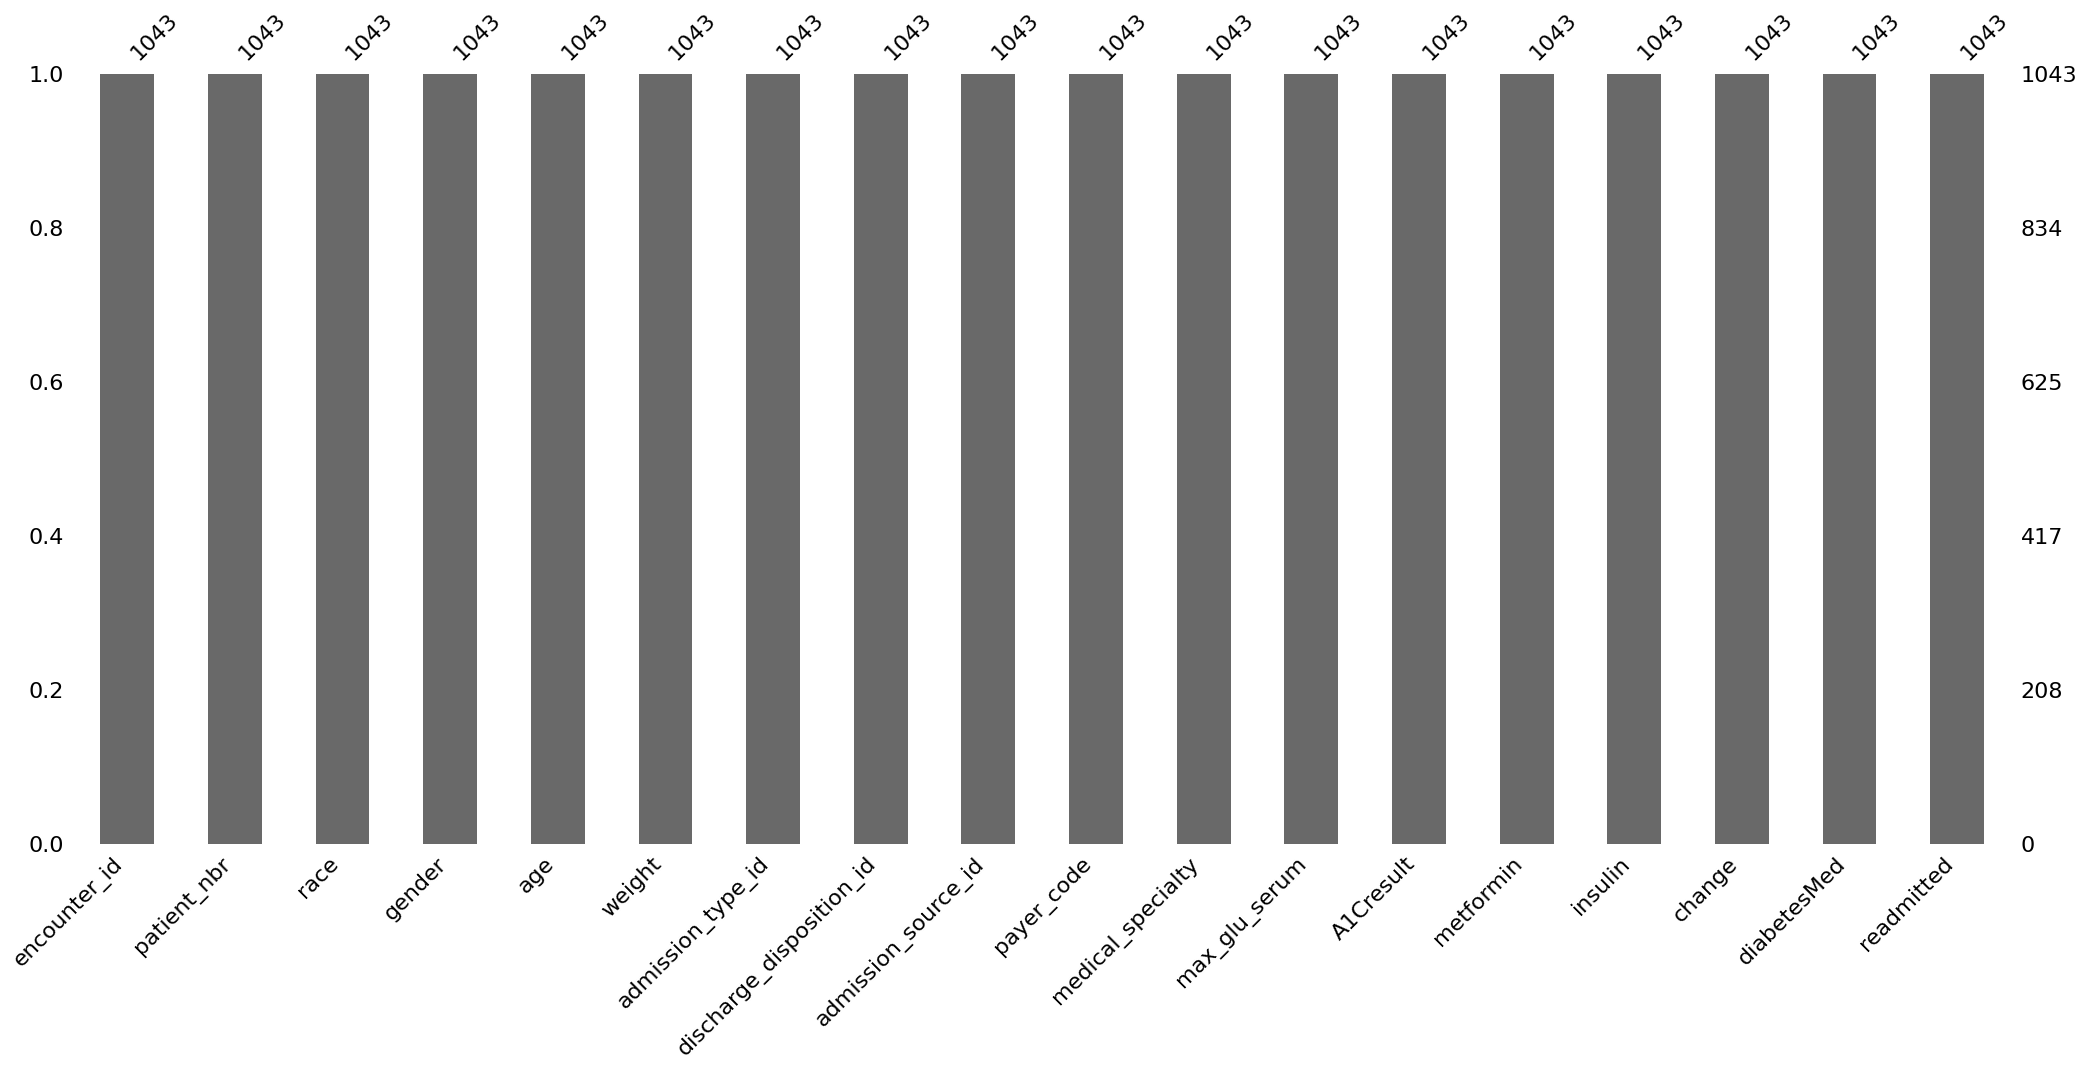

In [10]:
msno.bar(diabetes)

<AxesSubplot: >

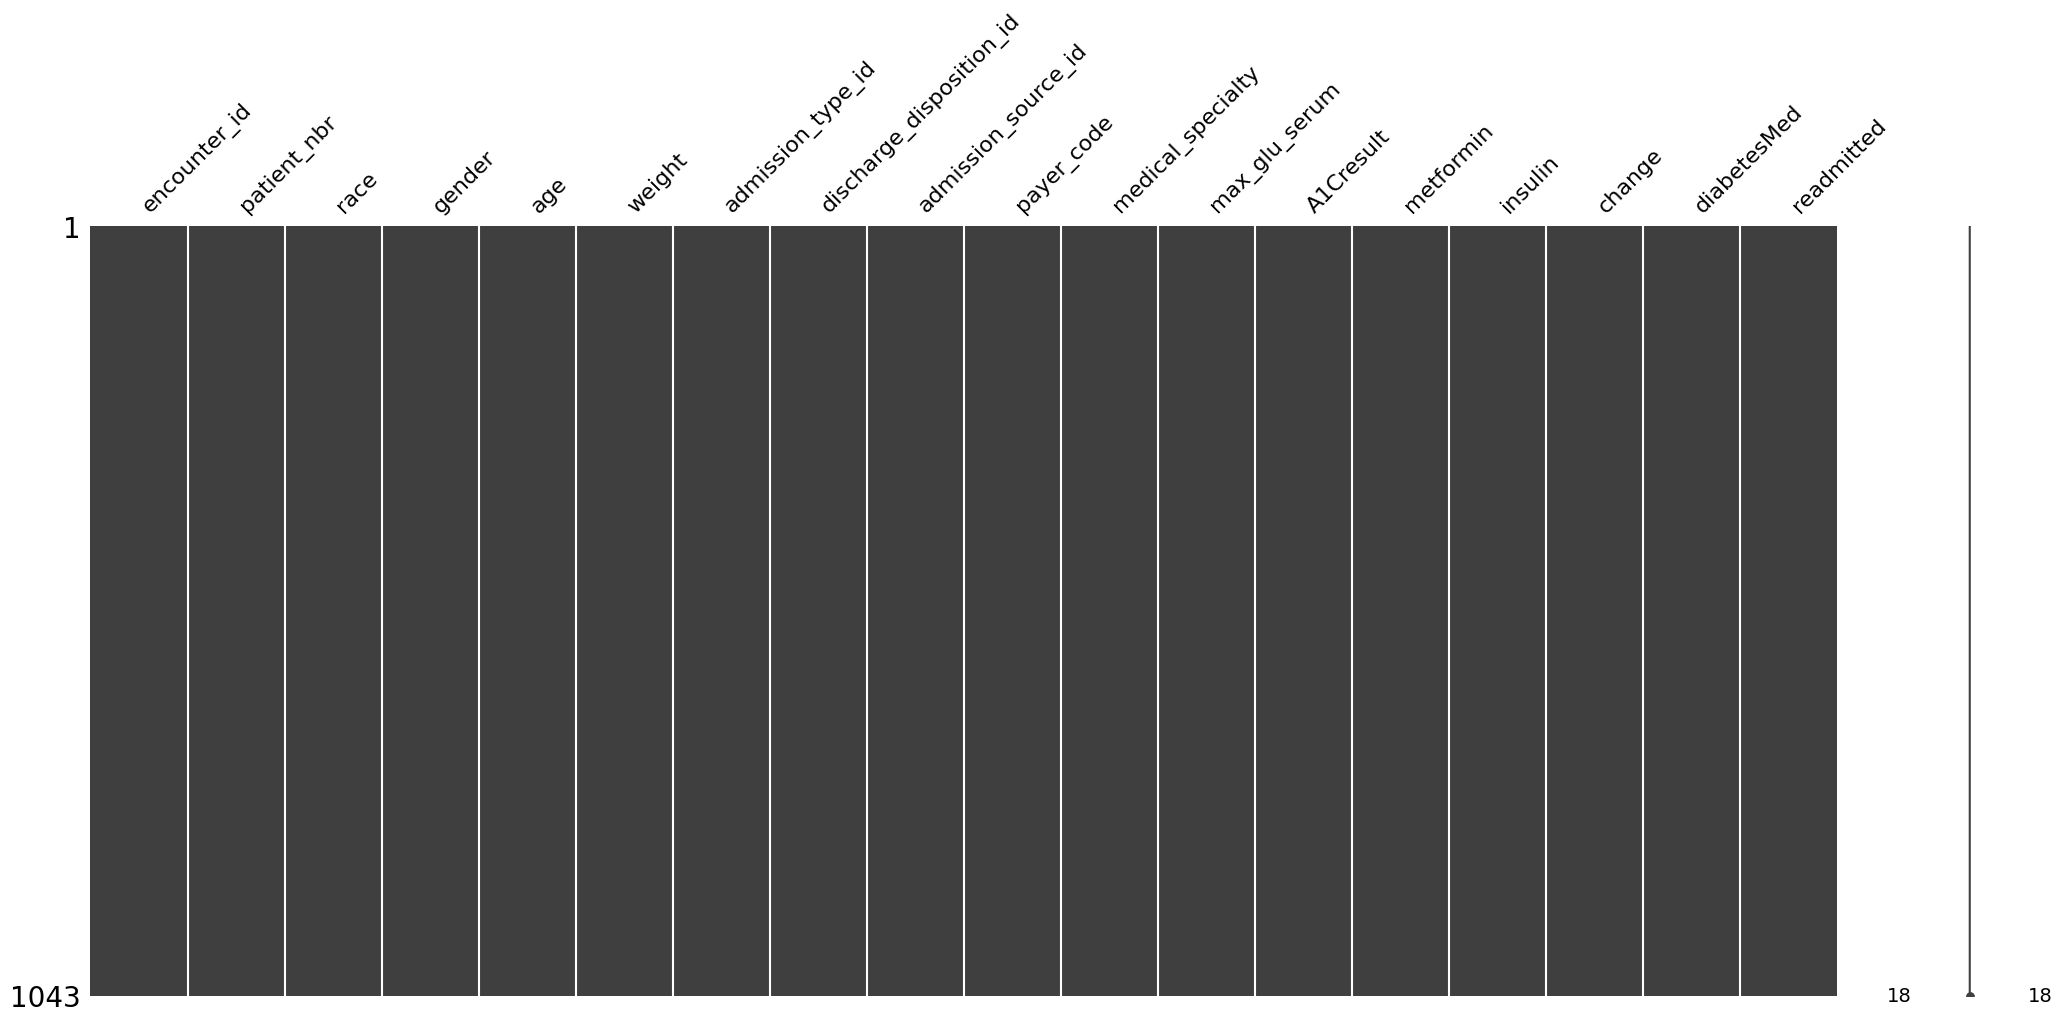

In [11]:
msno.matrix(diabetes)

# Numerical Features

In [12]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
0,88792836,100654011,0,0,7,1,3,3,1,4,5,0,0,0,2,1,1,2
1,88986678,58682736,0,1,8,2,1,11,5,4,3,0,0,0,2,0,1,0
2,89032962,69250302,0,1,6,4,1,1,7,7,4,0,0,0,0,0,1,1
3,89191392,62022042,0,1,4,1,1,3,7,9,11,0,0,0,0,0,1,1
4,89277516,30950811,0,1,5,4,3,1,1,5,5,0,0,0,0,0,1,1


In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              1043 non-null   int64
 1   patient_nbr               1043 non-null   int64
 2   race                      1043 non-null   int64
 3   gender                    1043 non-null   int64
 4   age                       1043 non-null   int64
 5   weight                    1043 non-null   int64
 6   admission_type_id         1043 non-null   int64
 7   discharge_disposition_id  1043 non-null   int64
 8   admission_source_id       1043 non-null   int64
 9   payer_code                1043 non-null   int64
 10  medical_specialty         1043 non-null   int64
 11  max_glu_serum             1043 non-null   int64
 12  A1Cresult                 1043 non-null   int64
 13  metformin                 1043 non-null   int64
 14  insulin                   1043 non-null 

In [14]:
diabetes.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
count,1.043000e+03,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.0,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,1.832187e+08,7.141533e+07,0.071908,0.496644,6.232023,2.384468,1.763183,2.465005,4.288591,3.282838,4.019175,0.0,0.206136,0.230105,0.352828,0.284756,0.639501,0.650048
std,8.819035e+07,3.121480e+07,0.391374,0.500229,1.437719,1.660432,0.889535,2.552232,2.883225,2.862083,2.748864,0.0,0.645879,0.476688,0.791121,0.451514,0.480375,0.647798
min,8.879284e+07,8.946900e+04,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.170250e+08,5.338246e+07,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.531965e+08,7.649423e+07,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,6.000000,1.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.282036e+08,9.689198e+07,0.000000,1.000000,7.000000,4.000000,3.000000,3.000000,7.000000,5.000000,5.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.396065e+08,1.842748e+08,4.000000,1.000000,9.000000,8.000000,5.000000,18.000000,17.000000,14.000000,49.000000,0.0,3.000000,3.000000,3.000000,1.000000,1.000000,2.000000


### Skewness

In [15]:
diabetes.skew()

encounter_id                1.230536
patient_nbr                -0.500432
race                        6.611166
gender                      0.013442
age                        -0.690543
weight                      1.225837
admission_type_id           0.514498
discharge_disposition_id    2.385514
admission_source_id        -0.142717
payer_code                  1.076375
medical_specialty           6.394087
max_glu_serum               0.000000
A1Cresult                   3.137093
metformin                   2.164585
insulin                     1.953379
change                      0.955265
diabetesMed                -0.581918
readmitted                  0.490836
dtype: float64

### Univariate Analysis

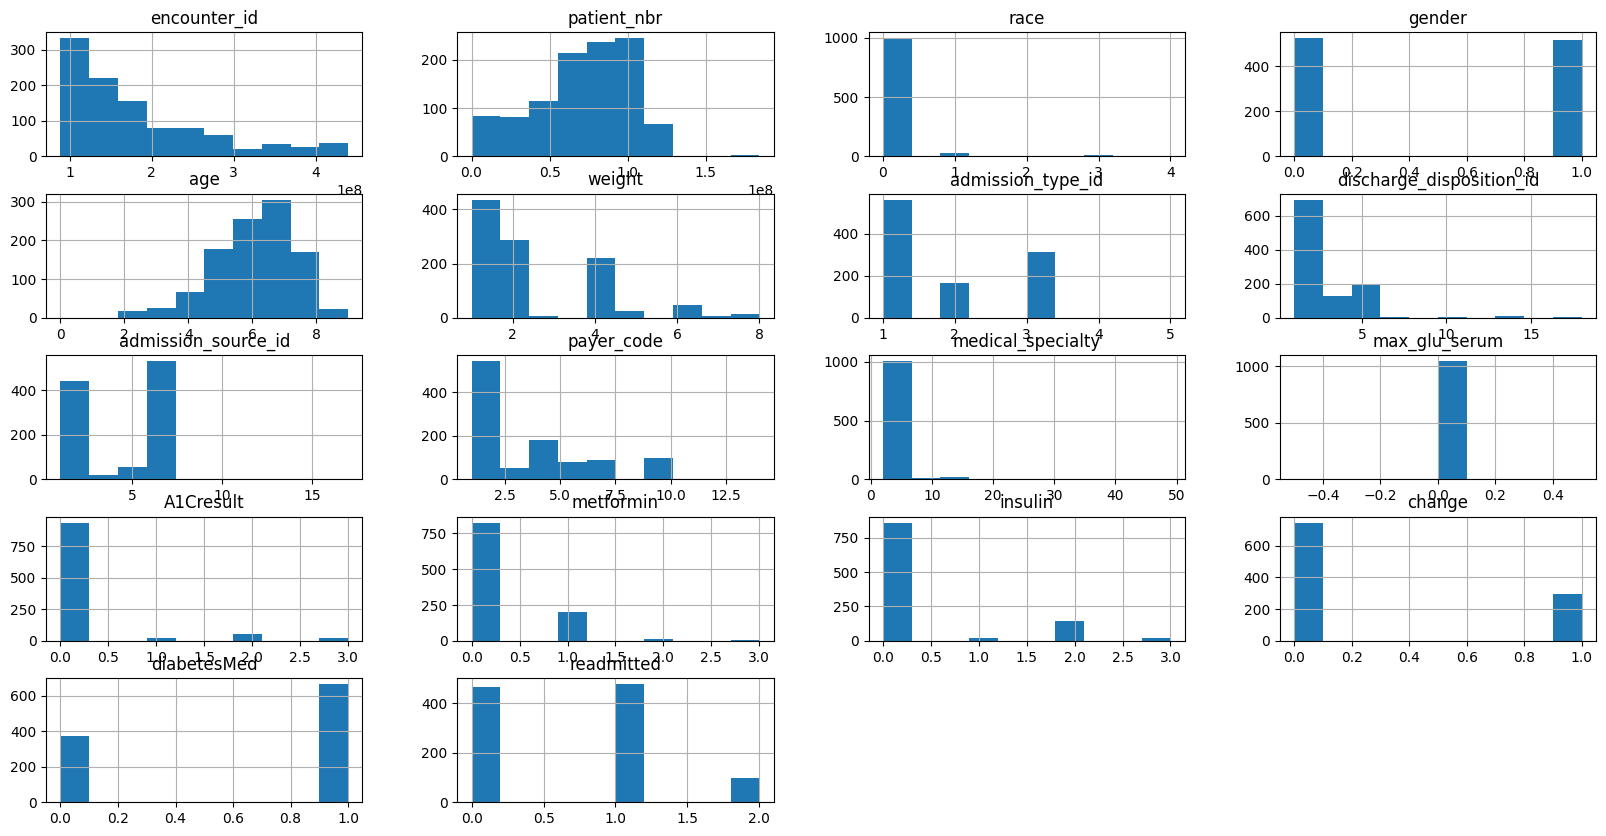

In [16]:
diabetes.hist(figsize=(20,10));

### Correlation Matrix & Scatter Plots

In [17]:
diabetes.corr()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
encounter_id,1.000000,0.057808,0.008052,0.006522,0.026855,-0.008447,0.032337,0.058381,-0.029871,0.088886,-0.040787,NaN,0.295046,0.084478,0.180159,0.065221,0.105548,-0.115560
patient_nbr,0.057808,1.000000,0.048750,0.021839,-0.039199,0.004427,0.008283,0.003471,-0.030547,0.017065,0.011837,NaN,0.061413,-0.033883,-0.039839,-0.030349,-0.015167,0.053356
race,0.008052,0.048750,1.000000,-0.015923,-0.091080,0.007627,-0.042007,-0.034468,0.051331,0.127475,0.031723,NaN,0.058998,0.060402,0.014065,0.019786,0.041027,0.008503
gender,0.006522,0.021839,-0.015923,1.000000,-0.068306,0.037951,0.020858,-0.079584,-0.005649,0.012394,-0.090684,NaN,0.009569,-0.065178,0.000570,0.010608,-0.001045,0.045239
age,0.026855,-0.039199,-0.091080,-0.068306,1.000000,-0.195796,0.040754,0.158877,-0.038857,-0.420143,-0.262656,NaN,-0.091862,-0.033167,-0.145450,-0.023522,0.011451,-0.033295
weight,-0.008447,0.004427,0.007627,0.037951,-0.195796,1.000000,-0.032511,0.046771,0.026115,0.120476,-0.010027,NaN,0.001199,0.076057,0.066129,0.058645,0.058426,-0.042531
admission_type_id,0.032337,0.008283,-0.042007,0.020858,0.040754,-0.032511,1.000000,0.066728,-0.870631,-0.032470,0.254615,NaN,-0.050253,0.119582,-0.043436,0.074872,0.112198,0.015925
discharge_disposition_id,0.058381,0.003471,-0.034468,-0.079584,0.158877,0.046771,0.066728,1.000000,-0.064552,-0.073465,-0.036701,NaN,0.090253,0.046855,0.058880,0.058207,0.031187,-0.073297
admission_source_id,-0.029871,-0.030547,0.051331,-0.005649,-0.038857,0.026115,-0.870631,-0.064552,1.000000,0.046620,-0.192381,NaN,0.039658,-0.107715,0.006226,-0.088251,-0.115361,-0.008049
payer_code,0.088886,0.017065,0.127475,0.012394,-0.420143,0.120476,-0.032470,-0.073465,0.046620,1.000000,0.122512,NaN,0.012558,0.019076,0.132628,0.009652,0.003732,-0.004019


In [18]:
corr = diabetes.corr()
diabetes[diabetes.columns[1:]].corr()['readmitted'].sort_values(ascending=False)[:10]

readmitted             1.000000
insulin                0.074497
diabetesMed            0.056801
patient_nbr            0.053356
gender                 0.045239
admission_type_id      0.015925
race                   0.008503
change                 0.006351
payer_code            -0.004019
admission_source_id   -0.008049
Name: readmitted, dtype: float64

In [19]:
diabetes.groupby('readmitted').mean()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,
0,1.980137e+08,6.913308e+07,0.077419,0.479570,6.268817,2.455914,1.815054,2.763441,4.094624,3.292473,4.270968,0.0,0.238710,0.253763,0.294624,0.286022,0.617204
1,1.688250e+08,7.350374e+07,0.056485,0.497908,6.228033,2.345188,1.642259,2.148536,4.698745,3.280335,3.847280,0.0,0.182008,0.205021,0.382845,0.278243,0.644351
2,1.832240e+08,7.204517e+07,0.120000,0.570000,6.080000,2.240000,2.100000,2.590000,3.230000,3.250000,3.670000,0.0,0.170000,0.240000,0.480000,0.310000,0.720000
